In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
file_path = ("C:\\Users\\hp\\Desktop\\All_the_Intermediate_Colleges_in_Pakistan.csv")
df = pd.read_csv(file_path)


In [105]:
df.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [106]:
df.describe()

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


In [107]:
df.shape

(1630, 6)

In [108]:
df.columns

Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')

In [109]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Name             object
Location         object
Study Program    object
Sector           object
Affiliation      object
Rating           object
dtype: object


In [110]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [112]:
df.columns = df.columns.str.strip()

In [113]:
# Remove any NaN values from the 'City' column
df.dropna(subset=['Location'], inplace=True)

# Check for duplicates and remove them
df.drop_duplicates(subset=['Location'], inplace=True)

# Find the top 10 cities with the most colleges (using value_counts)
top_cities = df['Location'].value_counts().head(10)


In [114]:
# Ensure proper city extraction first
def extract_city(location):
    if pd.isna(location):
        return np.nan
    # Common city patterns - make sure this list is comprehensive
    cities = ['Lahore', 'Islamabad', 'Faisalabad', 'Rawalpindi', 'Karachi',
              'Gujranwala', 'Sargodha', 'Peshawar', 'Bahawalpur', 'Multan']  # Add more as needed

    for city in cities:
        if city.lower() in location.lower():
            return city
    return np.nan

# Apply city extraction
df['City'] = df['Location'].apply(extract_city)

# Now drop NA in City (not Location)
df = df.dropna(subset=['City'])

In [115]:
df['Sector'] = df['Sector'].fillna('Unknown')
df['Affiliation'] = df['Affiliation'].fillna('Unspecified')

In [116]:
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d)').astype(float)

In [117]:
df['Has_FSc'] = df['Study Program'].str.contains('FSc', case=False, na=False)
df['Has_ICS'] = df['Study Program'].str.contains('ICS', case=False, na=False)
df['Has_FA'] = df['Study Program'].str.contains('FA', case=False, na=False)
df['Has_ICom'] = df['Study Program'].str.contains('Icom', case=False, na=False)

In [118]:
sns.set(style="whitegrid")

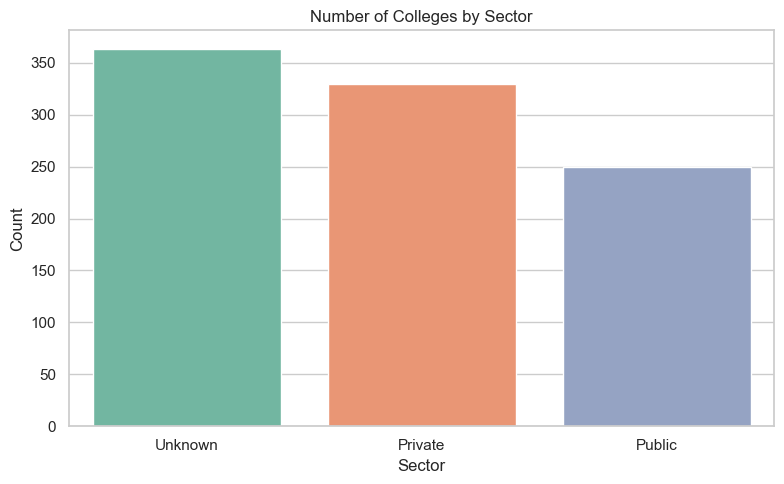

In [119]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index, palette='Set2')
plt.title('Number of Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

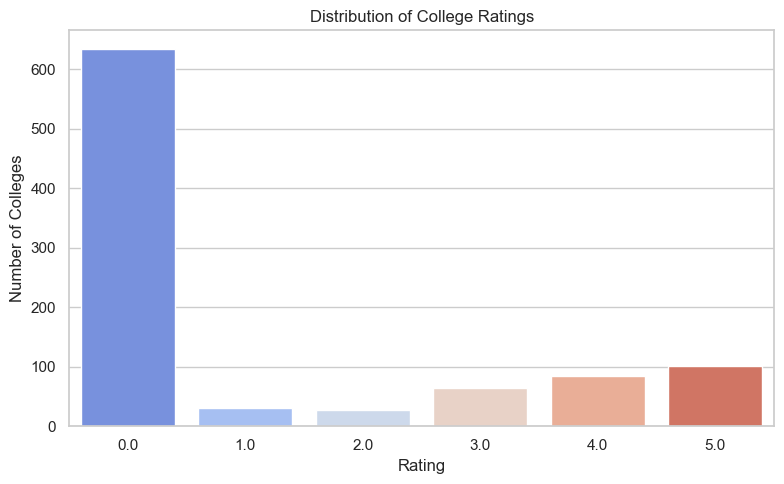

In [127]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Rating', palette='coolwarm')
plt.title('Distribution of College Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Colleges')
plt.tight_layout()
plt.show()


Number of cities found: 10


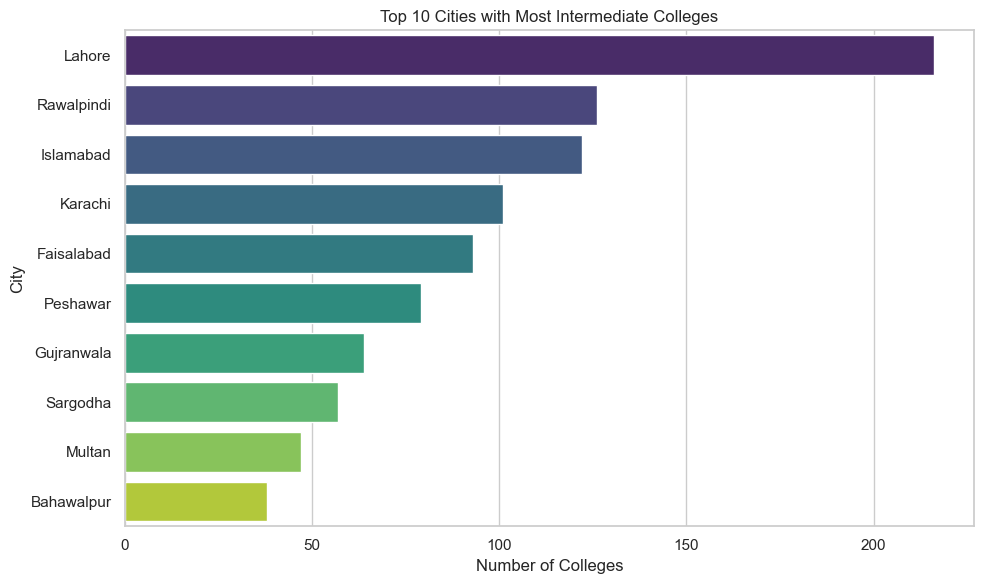

In [130]:
# Get top cities - verify length
top_cities = df['City'].value_counts().head(10)
print(f"Number of cities found: {len(top_cities)}")  # Should show 10

# Plot only if we have 10 cities
if len(top_cities) == 10:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
    plt.title('Top 10 Cities with Most Intermediate Colleges')
    plt.xlabel('Number of Colleges')
    plt.ylabel('City')
    plt.tight_layout()
    plt.show()
else:
    print(f"Warning: Only found {len(top_cities)} cities in the data")

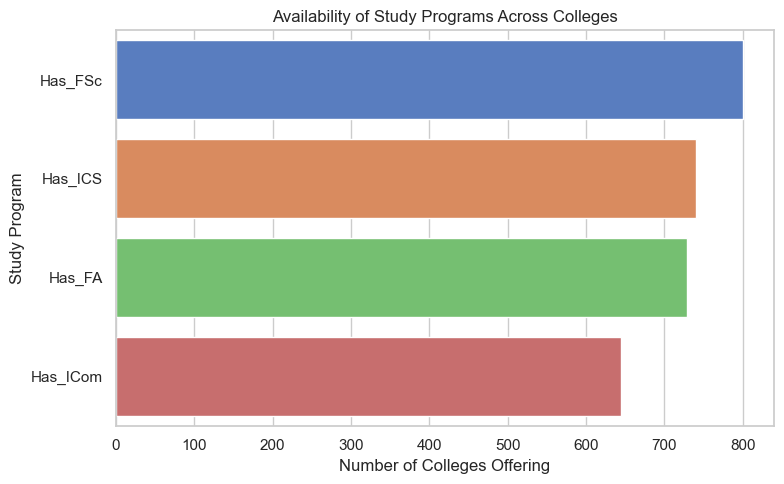

In [122]:
programs = ['Has_FSc', 'Has_ICS', 'Has_FA', 'Has_ICom']
program_counts = df[programs].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=program_counts.values, y=program_counts.index, palette='muted')
plt.title('Availability of Study Programs Across Colleges')
plt.xlabel('Number of Colleges Offering')
plt.ylabel('Study Program')
plt.tight_layout()
plt.show()

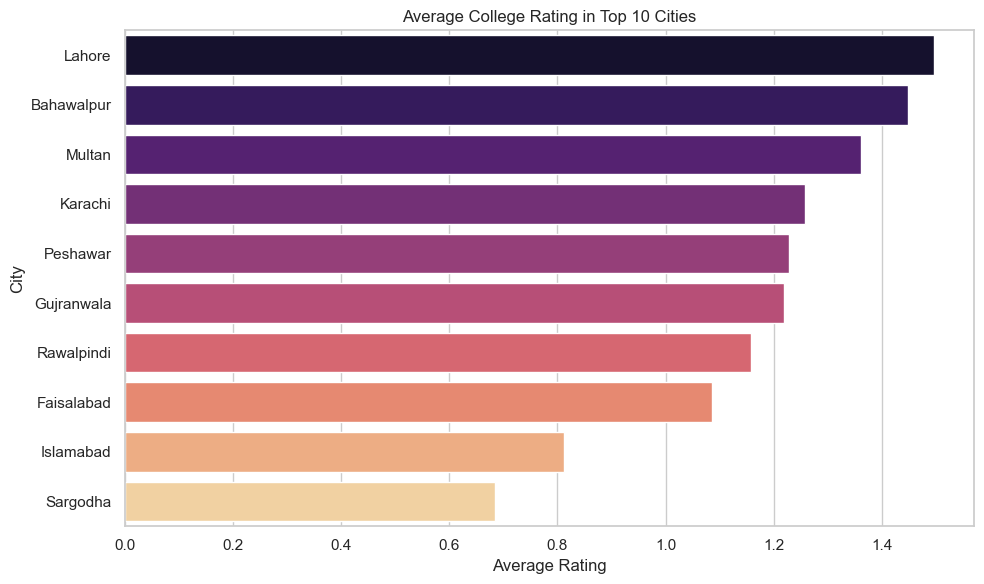

In [123]:
top_cities_list = top_cities.index.tolist()
top_city_ratings = df[df['City'].isin(top_cities_list)].groupby('City')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_city_ratings.values, y=top_city_ratings.index, palette='magma')
plt.title('Average College Rating in Top 10 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.show()

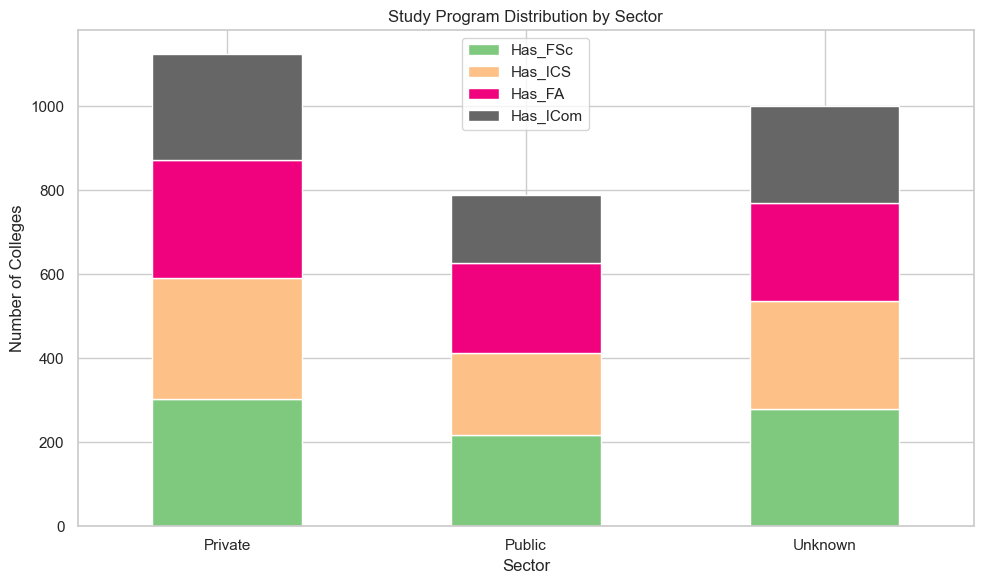

In [124]:
sector_program = df.groupby('Sector')[programs].sum()
sector_program.plot(kind='bar', stacked=True, figsize=(10, 6), colorma='Accent')
plt.title('Study Program Distribution by Sector')
plt.ylabel('Number of Colleges')
plt.xlabel('Sector')p
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

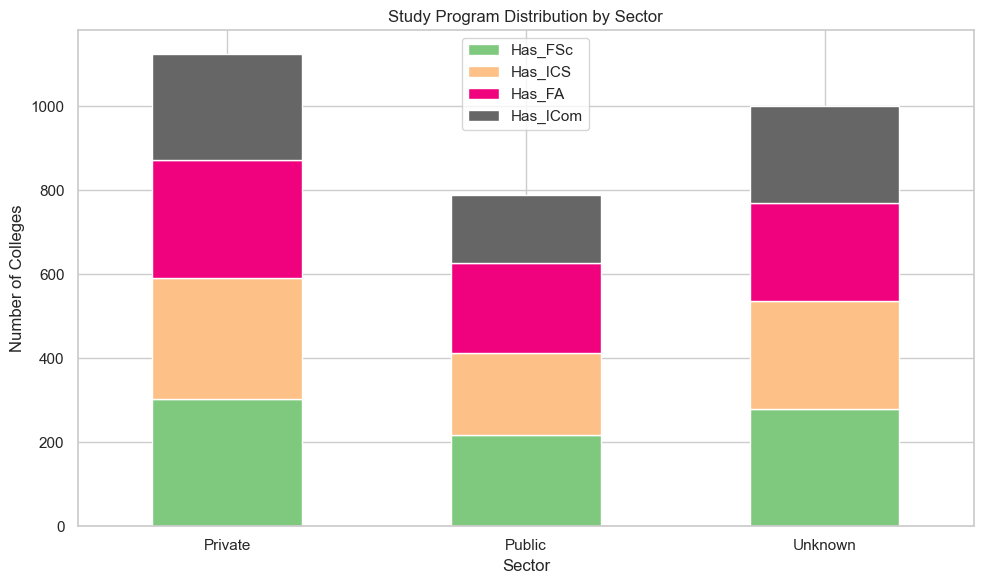

In [124]:
sector_program = df.groupby('Sector')[programs].sum()
sector_program.plot(kind='bar', stacked=True, figsize=(10, 6), colorma='Accent')
plt.title('Study Program Distribution by Sector')
plt.ylabel('Number of Colleges')
plt.xlabel('Sector')p
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

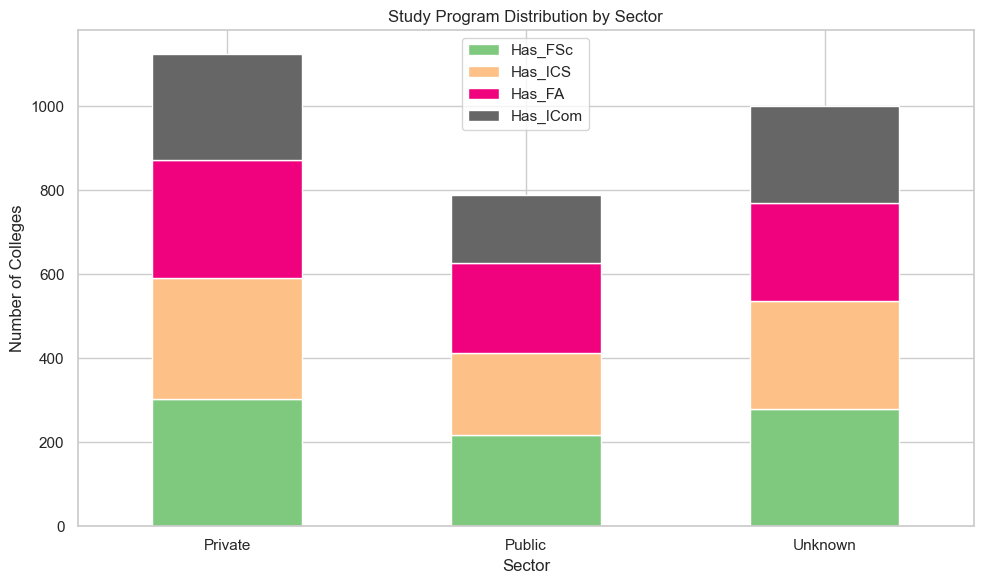

In [136]:
sector_program = df.groupby('Sector')[programs].sum()
sector_program.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title('Study Program Distribution by Sector')
plt.ylabel('Number of Colleges')
plt.xlabel('Sector')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()